In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving loan_application.csv to loan_application (3).csv


In [ ]:
import pandas as pd 
import io
import numpy as np
from sklearn import metrics

df = pd.read_csv(io.BytesIO(uploaded['loan_application.csv'])) 

In [ ]:
# Fills in NaN values with mode of that attribute

d = {'Gender': 'Male', 'Married': 'Yes', 'Dependents': 0, 'Education': 'Gradutate', 'Self_Employed': 'No', 'LoanAmount': 120, 'Loan_Amount_Term': 360, 'Credit_History': 1, 'Property_Area': 'Semiurban'}

df.fillna(value=d, inplace=True)

In [ ]:
clust_df = df[['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

clust_df.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,Graduate,5849,0.0,120.0,1.0
1,Graduate,4583,1508.0,128.0,1.0
2,Graduate,3000,0.0,66.0,1.0
3,Not Graduate,2583,2358.0,120.0,1.0
4,Graduate,6000,0.0,141.0,1.0


In [ ]:
# Replaces binary variables with 1s and 0s 
clust_df['Education'].replace( {'Graduate': int(1), 'Not Graduate': int(0)}, inplace=True)

# Added greater weighting to credit history
clust_df['Credit_History'].replace({1: 5}, inplace=True)

clust_df

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,1,5849,0.0,120.0,5.0
1,1,4583,1508.0,128.0,5.0
2,1,3000,0.0,66.0,5.0
3,0,2583,2358.0,120.0,5.0
4,1,6000,0.0,141.0,5.0
...,...,...,...,...,...
609,1,2900,0.0,71.0,5.0
610,1,4106,0.0,40.0,5.0
611,1,8072,240.0,253.0,5.0
612,1,7583,0.0,187.0,5.0


In [ ]:
bin_df = pd.DataFrame(columns=range(0,10), index=range(0,10))

def binary_dis(t1, t2):
  not_same = 0
  if t1['Education'] != t2['Education']:
    not_same += 1
  if t1['Credit_History'] != t2['Credit_History']:
    not_same += 1
  return not_same / 2

i = 0
while i < 10:
  j = 0
  while j < 10:
    bin_df.loc[i,j] = binary_dis(clust_df.iloc[i], clust_df.iloc[j])
    j += 1
  i += 1

from IPython.display import display, HTML
display(HTML(bin_df.to_html()))

In [ ]:
clust_df['LoanAmount'].std()

84.1809670102725

In [ ]:
#pd.DataFrame.mad

def find_zscore(col_mean, n, abs_mean_dev):
  return (n - col_mean) / (abs_mean_dev)

col_mean = clust_df['ApplicantIncome'].mean()
abs_mean_dev = clust_df['ApplicantIncome'].mad()
# print('Abs mean dev =', abs_mean_dev)
# print('Column mean =', col_mean)

i = 0

for n in clust_df['ApplicantIncome']:
  clust_df.loc[i, 'ApplicantIncome'] = round(find_zscore(col_mean, n, abs_mean_dev), 3)
  i += 1

col_mean = clust_df['CoapplicantIncome'].mean()
abs_mean_dev = clust_df['CoapplicantIncome'].mad()
# print('Abs mean dev =', abs_mean_dev)
# print('Column mean =', col_mean)

i = 0

for n in clust_df['CoapplicantIncome']:
  clust_df.loc[i, 'CoapplicantIncome'] = round(find_zscore(col_mean, n, abs_mean_dev), 3)
  i += 1


col_mean = clust_df['LoanAmount'].mean()
abs_mean_dev = clust_df['LoanAmount'].mad()
# print('Abs mean dev =', abs_mean_dev)
# print('Column mean =', col_mean)

i = 0

for n in clust_df['LoanAmount']:
  clust_df.loc[i, 'LoanAmount'] = round(find_zscore(col_mean, n, abs_mean_dev), 3)
  i += 1



clust_df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,1,0.147,-1.038,-0.472,5.0
1,1,-0.270,-0.073,-0.324,5.0
2,1,-0.792,-1.038,-1.474,5.0
3,0,-0.929,0.472,-0.472,5.0
4,1,0.197,-1.038,-0.083,5.0
...,...,...,...,...,...
609,1,-0.825,-1.038,-1.381,5.0
610,1,-0.428,-1.038,-1.956,5.0
611,1,0.879,-0.885,1.994,5.0
612,1,0.718,-1.038,0.770,5.0


In [ ]:
list(clust_df.iloc[1])

[1.0, -0.27, -0.073, -0.324, 5.0]

In [ ]:
def e_distance(t1, t2):
  total = 0
  k = 0
  while k < len(t1):
    n = (list(t1)[k] - list(t2)[k]) ** 2
    total += n
    k += 1
  return round((total ** 1 / 2), 2)

distance_matrix_df = pd.DataFrame(columns=range(0,10), index=range(0,10))

i = 0
while i < 10:
  j = 0
  while j < 10:
    distance_matrix_df.loc[i,j] = e_distance(clust_df.iloc[i], clust_df.iloc[j])
    j += 1
  i += 1



In [ ]:
distance_matrix_df.drop([4], inplace=True)
distance_matrix_df.drop(columns=[4], inplace=True)
distance_matrix_df

,0,1,2,3,5,6,7,8,9
0,0,0.56,0.94,2.22,7.34,1.75,14.46,1.06,36.34
1,0.56,0,1.26,0.88,4.84,0.96,12.99,0.29,30.46
2,0.94,1.26,0,2.15,10.88,1.14,15.24,2.32,43.7
3,2.22,0.88,2.15,0,5.34,0.26,13.26,1.15,30.43
5,7.34,4.84,10.88,5.34,0,7.58,15.44,3.26,13.56
6,1.75,0.96,1.14,0.26,7.58,0,13.91,1.57,35.91
7,14.46,12.99,15.24,13.26,15.44,13.91,0,12.76,38.69
8,1.06,0.29,2.32,1.15,3.26,1.57,12.76,0,28.15
9,36.34,30.46,43.7,30.43,13.56,35.91,38.69,28.15,0


In [ ]:
distance_matrix_df.loc['04'] = [0] * 9

i = 0
while i < len(distance_matrix_df.loc['04']):
  if i != 0 and i != 4:
    distance_matrix_df.loc['04', i] = min(e_distance(clust_df.loc[i], clust_df.loc[4]), e_distance(clust_df.loc[i], clust_df.loc[0]))
  i += 1
distance_matrix_df

ValueError: ignored

In [ ]:
distance_matrix_df


,0,1,2,3,5,6,7,8,9,04
0,0,0.56,0.94,2.22,7.34,1.75,14.46,1.06,36.34,NaN
1,0.56,0,1.26,0.88,4.84,0.96,12.99,0.29,30.46,0.56
2,0.94,1.26,0,2.15,10.88,1.14,15.24,2.32,43.7,0.94
3,2.22,0.88,2.15,0,5.34,0.26,13.26,1.15,30.43,2.22
5,7.34,4.84,10.88,5.34,0,7.58,15.44,3.26,13.56,6.36
6,1.75,0.96,1.14,0.26,7.58,0,13.91,1.57,35.91,1.75
7,14.46,12.99,15.24,13.26,15.44,13.91,0,12.76,38.69,14.31
8,1.06,0.29,2.32,1.15,3.26,1.57,12.76,0,28.15,0.82
9,36.34,30.46,43.7,30.43,13.56,35.91,38.69,28.15,0,34.65
04,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

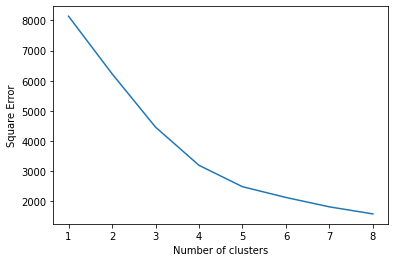

In [ ]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clust_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Square Error')
plt.show()

In [ ]:
clust_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Cluster,"(Cluster, 0)","(Cluster, 1)","(Cluster, 2)","(Cluster, 3)","(Cluster, 4)","(Cluster, 5)","(Cluster, 6)","(Cluster, 7)","(Cluster, 8)","(Cluster, 9)","(Cluster, 10)","(Cluster, 11)","(Cluster, 12)","(Cluster, 13)","(Cluster, 14)","(Cluster, 15)","(Cluster, 16)","(Cluster, 17)","(Cluster, 18)","(Cluster, 19)","(Cluster, 20)","(Cluster, 21)","(Cluster, 22)","(Cluster, 23)","(Cluster, 24)","(Cluster, 25)","(Cluster, 26)","(Cluster, 27)","(Cluster, 28)","(Cluster, 29)","(Cluster, 30)","(Cluster, 31)","(Cluster, 32)","(Cluster, 33)",...,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613
0,1.0,0.147,-1.038,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,-0.270,-0.073,-0.324,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,-0.792,-1.038,-1.474,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,-0.929,0.472,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.197,-1.038,-0.083,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.0,-0.428,-1.038,-1.956,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,1.0,0.879,-0.885,1.994,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,1.0,0.718,-1.038,0.770,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,1.0,-0.270,-1.038,-0.231,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
kmean=KMeans(n_clusters=3)
kmean.fit(clust_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmean.inertia_ #returns the SSE value

4432.883705630087

In [ ]:
clust_df['Cluster'] = [None] * 614
i = 0

for label in list(kmean.labels_):
  clust_df.loc[i, 'Cluster'] = label 
  i += 1

clust_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Cluster
0,1,0.147,-1.038,-0.472,5.0,0
1,1,-0.270,-0.073,-0.324,5.0,0
2,1,-0.792,-1.038,-1.474,5.0,0
3,0,-0.929,0.472,-0.472,5.0,0
4,1,0.197,-1.038,-0.083,5.0,0
...,...,...,...,...,...,...
609,1,-0.825,-1.038,-1.381,5.0,0
610,1,-0.428,-1.038,-1.956,5.0,0
611,1,0.879,-0.885,1.994,5.0,0
612,1,0.718,-1.038,0.770,5.0,0


In [ ]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
heirclust_df = clust_df[['Education','ApplicantIncome','LoanAmount','Credit_History']]

In [ ]:
heirclust_df.head()

,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0.147,-0.472,5.0
1,1,-0.270,-0.324,5.0
2,1,-0.792,-1.474,5.0
3,0,-0.929,-0.472,5.0
4,1,0.197,-0.083,5.0


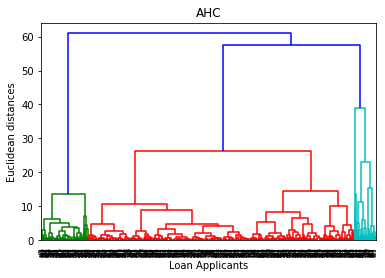

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(heirclust_df, method  = "ward"))
plt.title('AHC')
plt.xlabel('Loan Applicants')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(heirclust_df)

In [ ]:
print('AHC clusters:', list(y_hc)[:20])
print('K Means Clusters:', list(kmean.labels_)[:20])

AHC clusters: [2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]
K Means Clusters: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
# Compares whether the clusters produced by kmeans and ahc

same_cluster = 0
different_cluster = 0

i = 0
while i < len(kmean.labels_):
  if y_hc[i] == 0 and kmean.labels_[i] == 2:
    same_cluster += 1
  elif y_hc[i] == 1 and kmean.labels_[i] == 1:
    same_cluster += 1
  elif y_hc[i] == 2 and kmean.labels_[i] == 0:
    same_cluster += 1
  else:
    different_cluster += 1
  i += 1

print('Same Cluster:', same_cluster)
print('Different Cluster:', different_cluster)

Same Cluster: 592
Different Cluster: 22


In [ ]:
list(y_hc).count(2)

488

In [ ]:
i = 0
while i < 614:
  df.loc[i, 'Cluster'] = list(kmean.labels_)[i]
  i += 1

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1,Urban,1,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,1,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,1,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,1,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,1,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,1,0.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,1,0.0


In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace('Y', int(1))
df['Loan_Status'] = df['Loan_Status'].replace('N', int(0))

In [ ]:
df[['Cluster', 'Loan_Status']].groupby(['Cluster'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Cluster,Loan_Status
0,0.0,0.792157
2,2.0,0.705882
1,1.0,0.068966


In [ ]:
clust_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Cluster,"(Cluster, 0)","(Cluster, 1)","(Cluster, 2)","(Cluster, 3)","(Cluster, 4)","(Cluster, 5)","(Cluster, 6)","(Cluster, 7)","(Cluster, 8)","(Cluster, 9)","(Cluster, 10)","(Cluster, 11)","(Cluster, 12)","(Cluster, 13)","(Cluster, 14)","(Cluster, 15)","(Cluster, 16)","(Cluster, 17)","(Cluster, 18)","(Cluster, 19)","(Cluster, 20)","(Cluster, 21)","(Cluster, 22)","(Cluster, 23)","(Cluster, 24)","(Cluster, 25)","(Cluster, 26)","(Cluster, 27)","(Cluster, 28)","(Cluster, 29)","(Cluster, 30)","(Cluster, 31)","(Cluster, 32)","(Cluster, 33)",...,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613
0,1.0,0.147,-1.038,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,-0.270,-0.073,-0.324,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,-0.792,-1.038,-1.474,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,-0.929,0.472,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.197,-1.038,-0.083,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.0,-0.428,-1.038,-1.956,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,1.0,0.879,-0.885,1.994,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,1.0,0.718,-1.038,0.770,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,1.0,-0.270,-1.038,-0.231,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
clust_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Cluster,"(Cluster, 0)","(Cluster, 1)","(Cluster, 2)","(Cluster, 3)","(Cluster, 4)","(Cluster, 5)","(Cluster, 6)","(Cluster, 7)","(Cluster, 8)","(Cluster, 9)","(Cluster, 10)","(Cluster, 11)","(Cluster, 12)","(Cluster, 13)","(Cluster, 14)","(Cluster, 15)","(Cluster, 16)","(Cluster, 17)","(Cluster, 18)","(Cluster, 19)","(Cluster, 20)","(Cluster, 21)","(Cluster, 22)","(Cluster, 23)","(Cluster, 24)","(Cluster, 25)","(Cluster, 26)","(Cluster, 27)","(Cluster, 28)","(Cluster, 29)","(Cluster, 30)","(Cluster, 31)","(Cluster, 32)","(Cluster, 33)",...,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613
0,1.0,0.147,-1.038,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,-0.270,-0.073,-0.324,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,-0.792,-1.038,-1.474,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,-0.929,0.472,-0.472,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.197,-1.038,-0.083,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.0,-0.428,-1.038,-1.956,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,1.0,0.879,-0.885,1.994,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,1.0,0.718,-1.038,0.770,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,1.0,-0.270,-1.038,-0.231,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN